In [1]:
# Author: Thiago Akio Nakamura
# E-mail: akionakas@gmail.com

# Import necessary classes and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib as mpl
import pickle
from fdd import OperationMode
from fdd import FDD

import scipy.io
from scipy import linalg
from sklearn.datasets import make_blobs
from sklearn.mixture import PGMM
from scipy.stats import randint as sp_randint

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import train_test_split
from matplotlib.colors import LogNorm
from sklearn.grid_search import GridSearchCV
from time import time

In [2]:
# Load Tennessee Eastman Process Data
original_data = pickle.load( open( "data/tep_data_full.dat", "rb" ) )
original_normal_data = original_data["Normal"]
original_normal_data.shape

(721, 22)

In [3]:
def create_dynamic_data(data, delays):
    final_data = data
    for delay in delays:
        b = np.roll(data, delay, axis=0)
        final_data = np.hstack((final_data, b))
    return final_data[np.max(delays):, :]

In [4]:
complete_data = original_data
# delays = [1]
# for key in original_data:
#     complete_data[key] = create_dynamic_data(original_data[key], delays)
x_normal = complete_data["Normal"]

In [5]:
fdd = FDD(name='TEPFDD',
          training_type='spark',
          n_components=np.array([1, 2, 3, 4, 5, 6, 7, 8]),
          n_pc=np.array([14]),
          covar_types=np.array([7]),
          n_jobs=64)
_, _, _, _, id, is_new = fdd.fdd(x_normal)

There is no model registered, creating a normal one.


Normal operation condition detected.


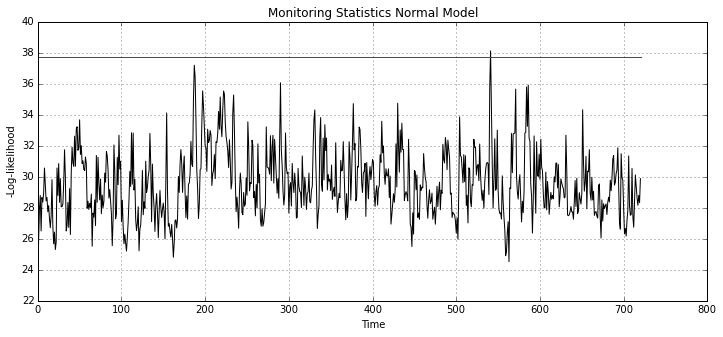

In [6]:
stats, thr, best_stats, best_thr, best_id, is_new = fdd.fdd(x_normal)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (thr, thr), color = 'red')
plt.title('Monitoring Statistics Normal Model')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

There is no model registered, creating a normal one.
Testing Fault18
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=11, n_init=1, n_iter=100, n_pc=5, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 38.


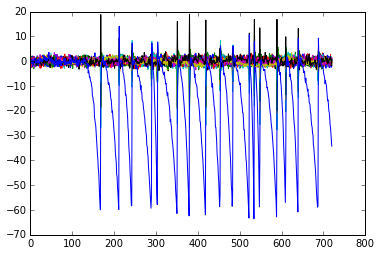

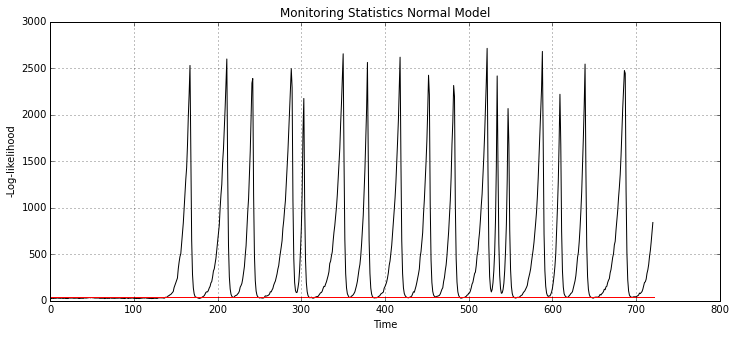

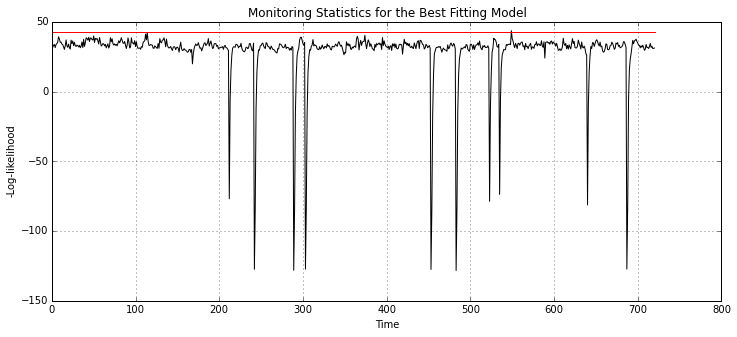

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault18
The detection delay was 38.


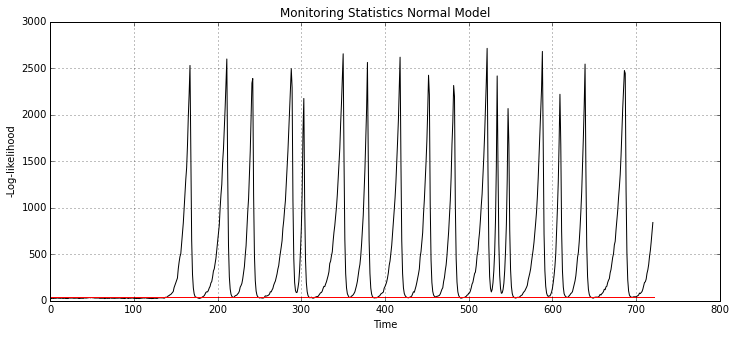

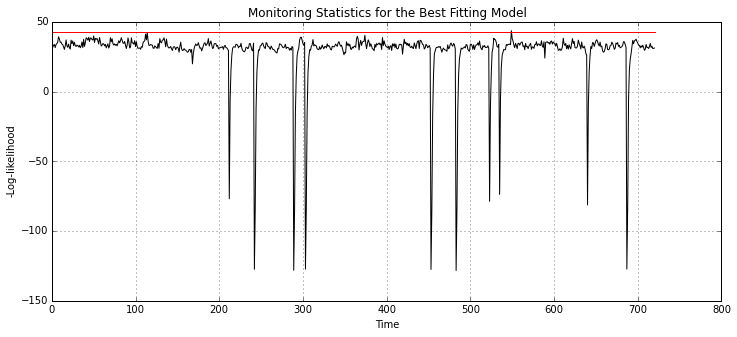

There is no model registered, creating a normal one.
Testing Fault19
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=4, n_init=1, n_iter=100, n_pc=2, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 29.


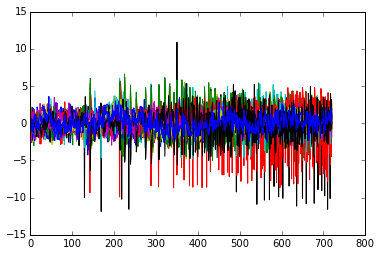

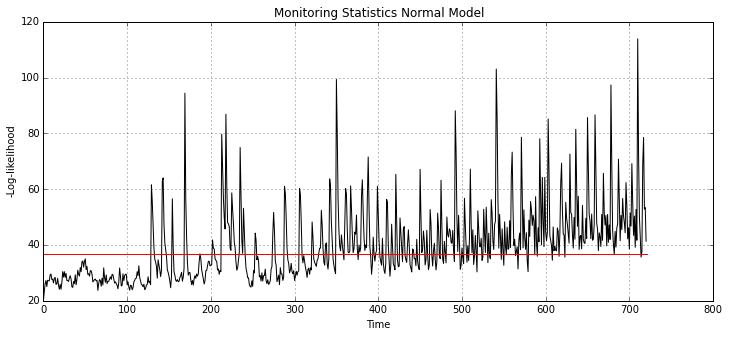

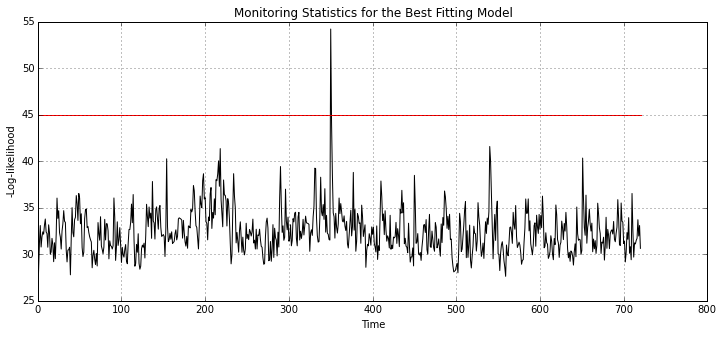

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault19
The detection delay was 29.


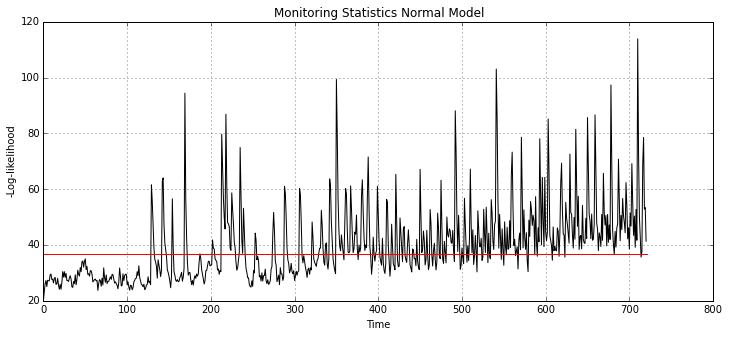

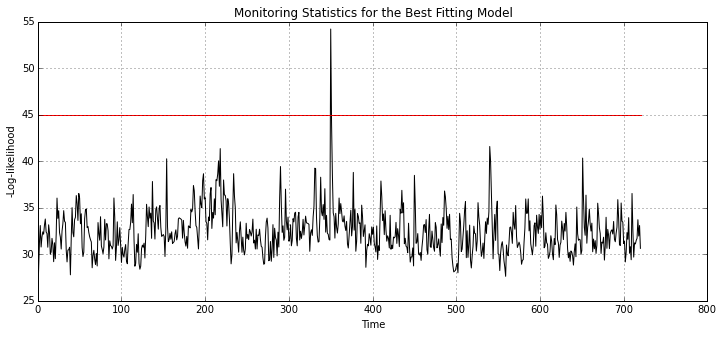

There is no model registered, creating a normal one.
Testing Normal
---------
First test
Normal operation condition detected.
The detection delay was 277.


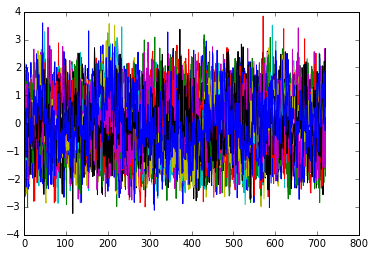

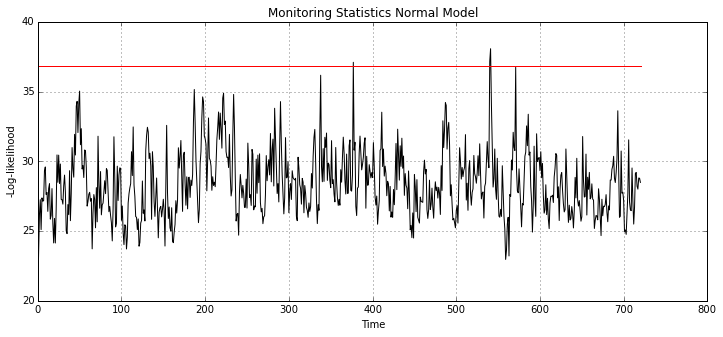

---------
Second test
Normal operation condition detected.
The detection delay was 277.


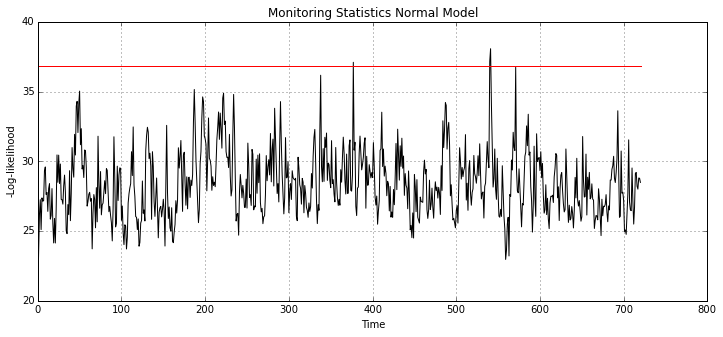

There is no model registered, creating a normal one.
Testing Fault10
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=4, n_init=1, n_iter=100, n_pc=3, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 20.


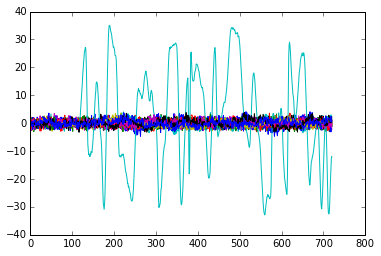

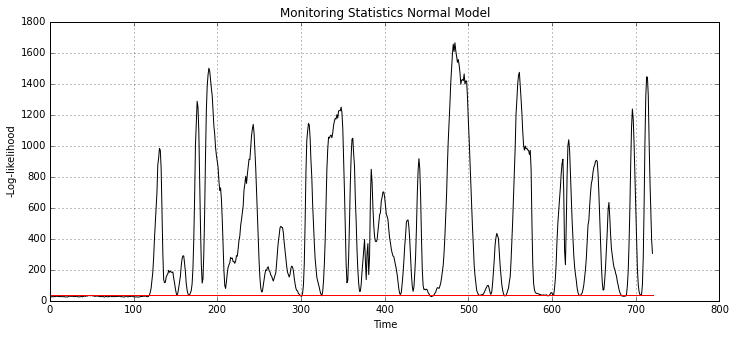

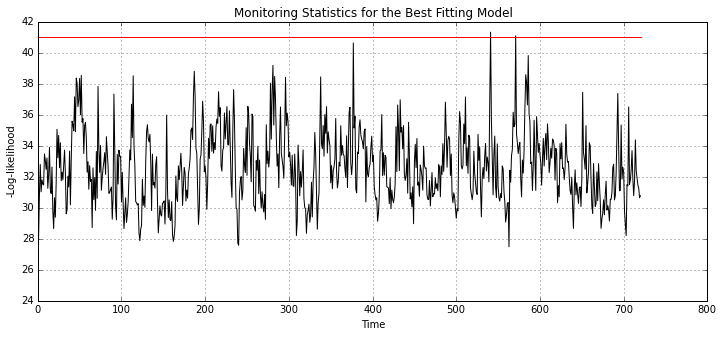

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault10
The detection delay was 20.


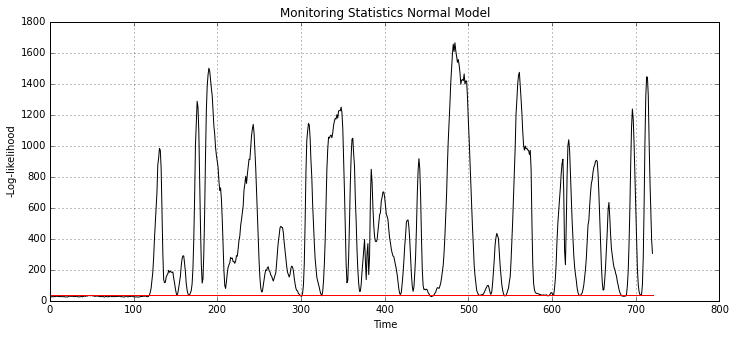

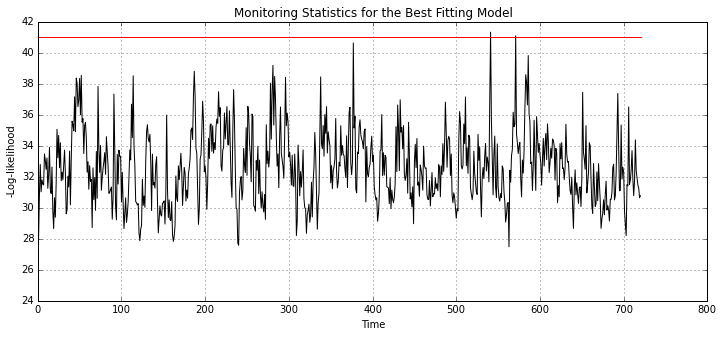

There is no model registered, creating a normal one.
Testing Fault11
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=3, n_init=1, n_iter=100, n_pc=3, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 2.


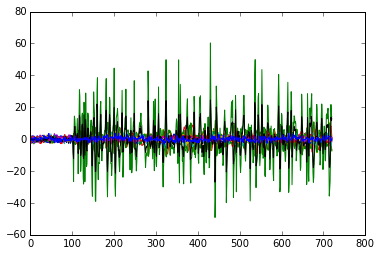

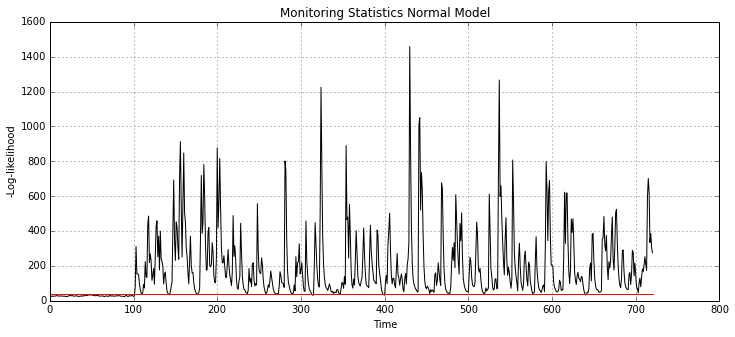

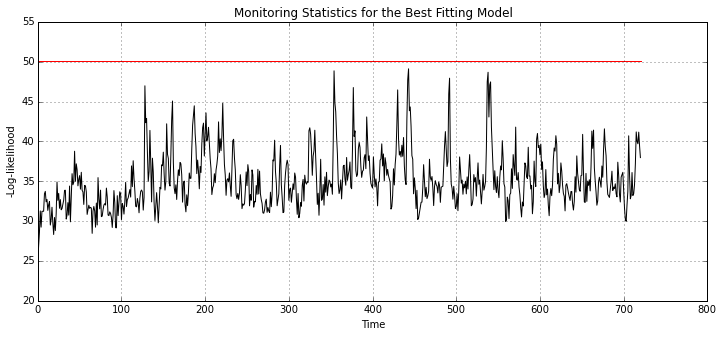

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault11
The detection delay was 2.


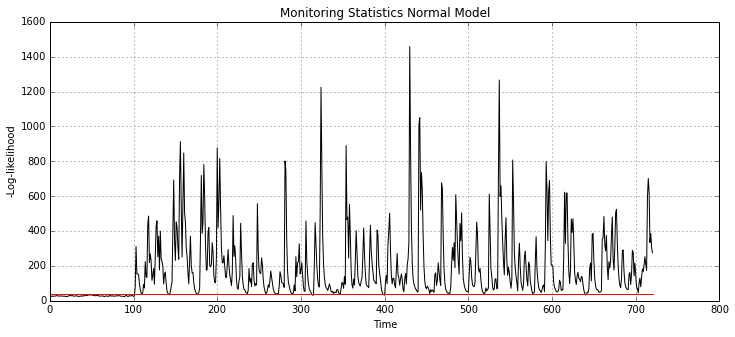

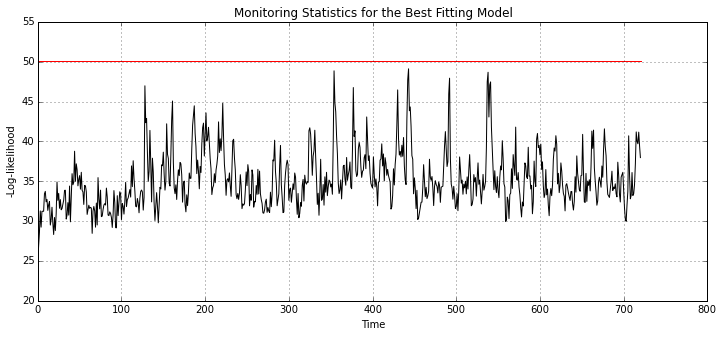

There is no model registered, creating a normal one.
Testing Fault12
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=2, n_init=1, n_iter=100, n_pc=3, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 12.


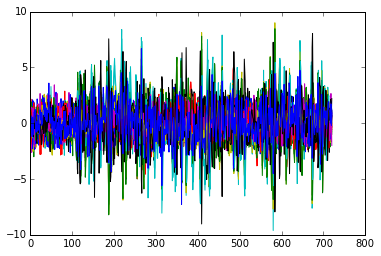

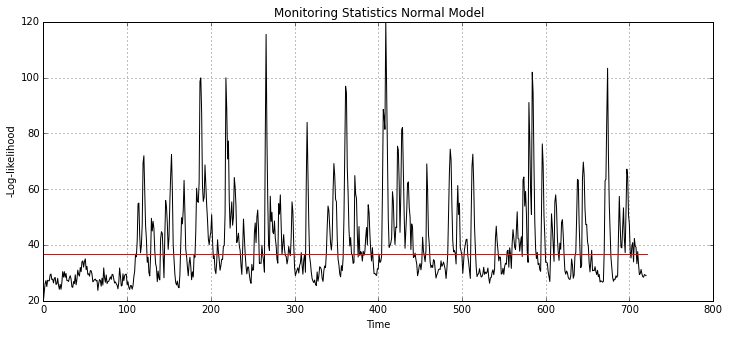

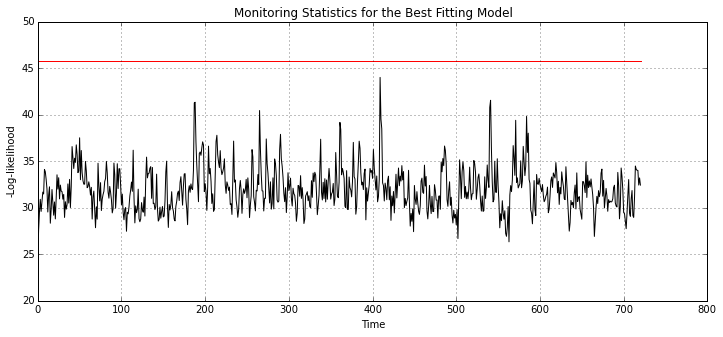

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault12
The detection delay was 12.


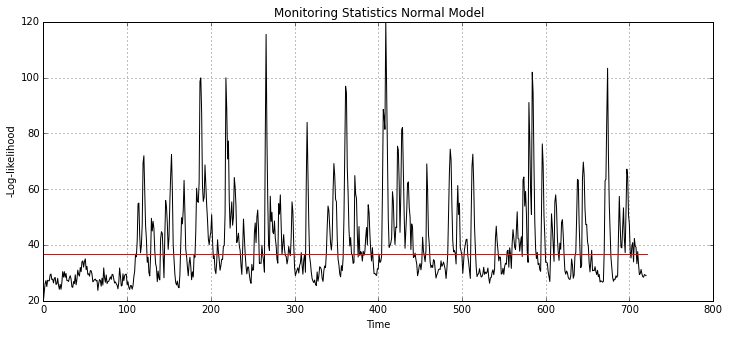

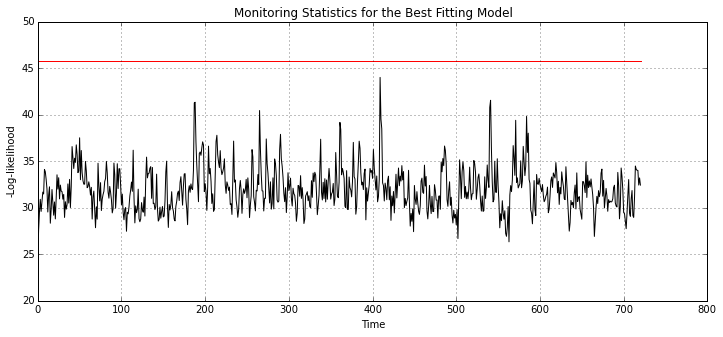

There is no model registered, creating a normal one.
Testing Fault13
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='RUR', init_params='wmpn', min_covar=1e-07,
   n_components=12, n_init=1, n_iter=100, n_pc=7, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 11.


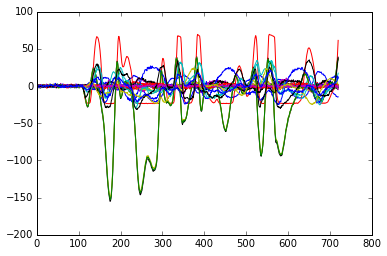

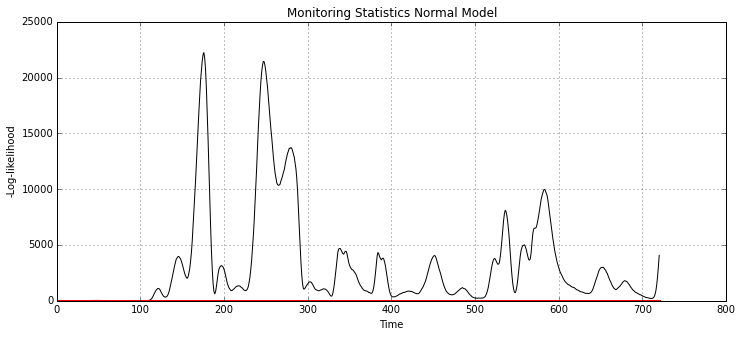

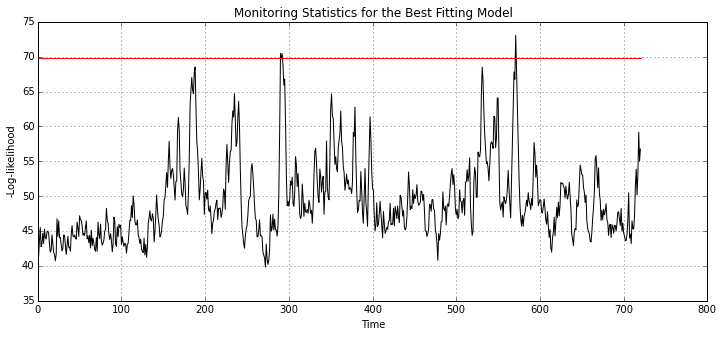

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault13
The detection delay was 11.


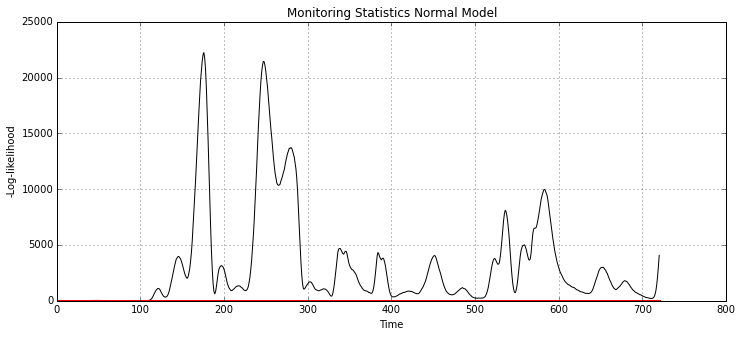

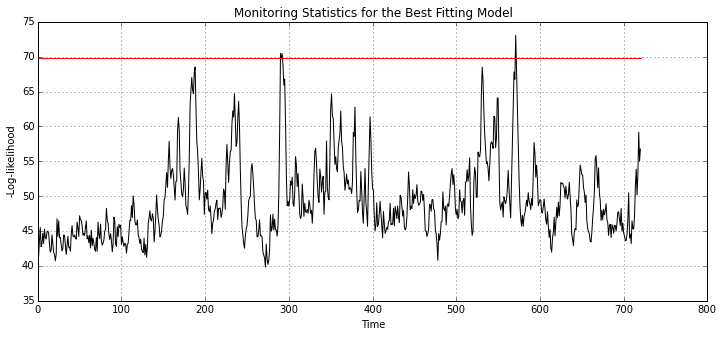

There is no model registered, creating a normal one.
Testing Fault14
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=2, n_init=1, n_iter=100, n_pc=5, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 3.


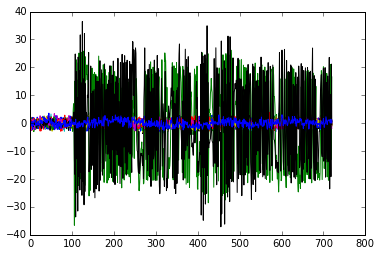

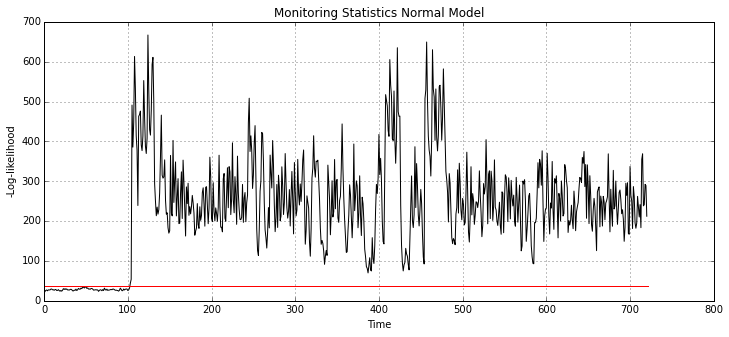

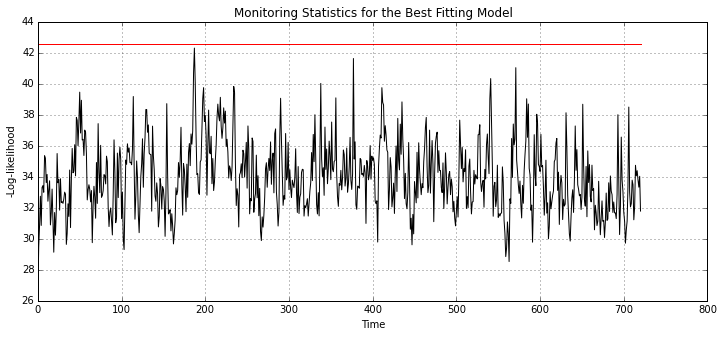

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault14
The detection delay was 3.


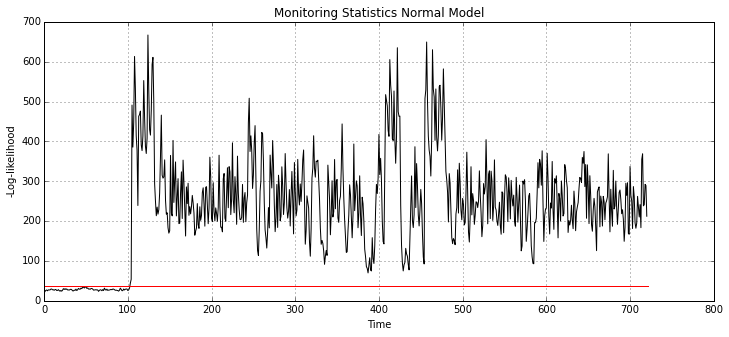

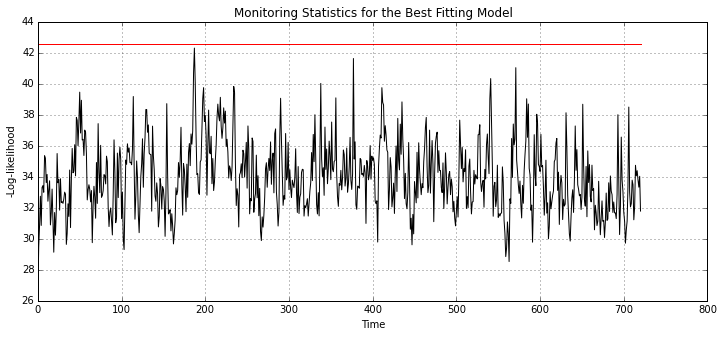

There is no model registered, creating a normal one.
Testing Fault15
---------
First test
Normal operation condition detected.
The detection delay was 238.


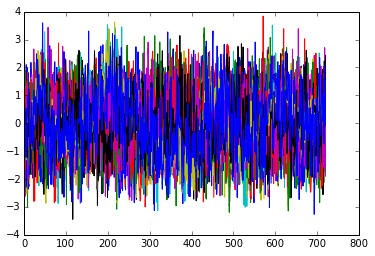

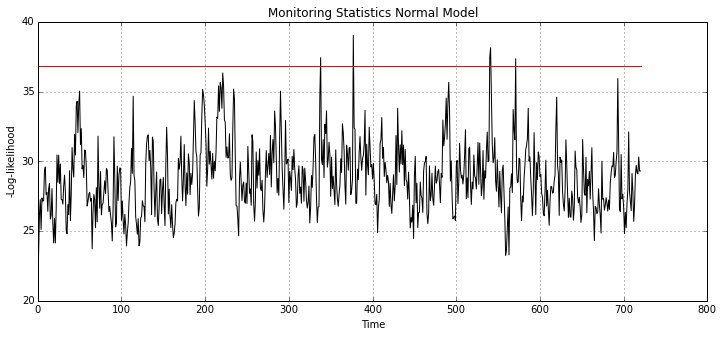

---------
Second test
Normal operation condition detected.
The detection delay was 238.


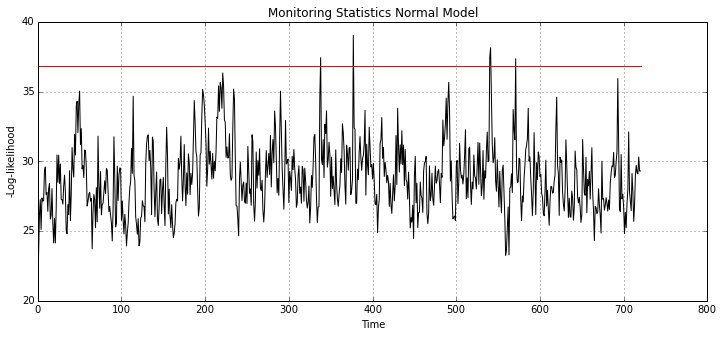

There is no model registered, creating a normal one.
Testing Fault16
---------
First test
Normal operation condition detected.
The detection delay was 277.


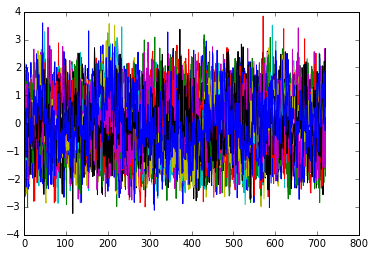

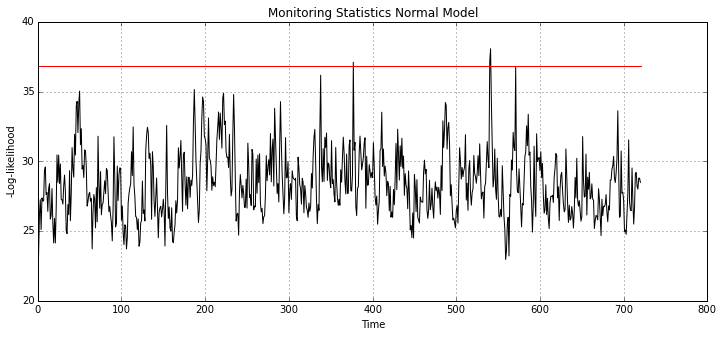

---------
Second test
Normal operation condition detected.
The detection delay was 277.


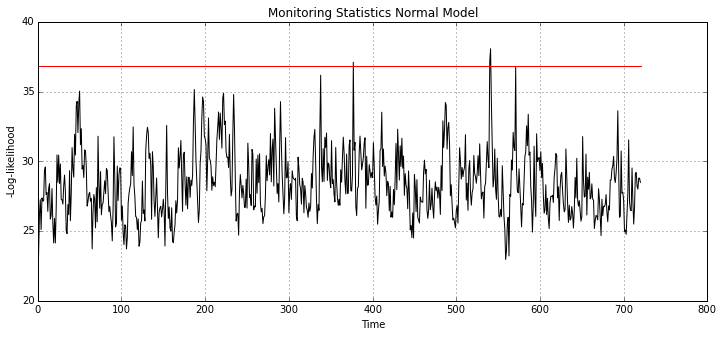

There is no model registered, creating a normal one.
Testing Fault17
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=11, n_init=1, n_iter=100, n_pc=2, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 16.


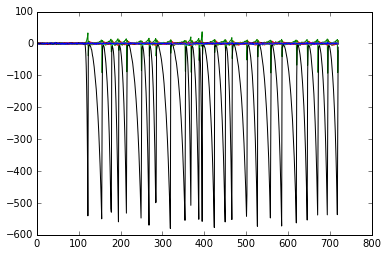

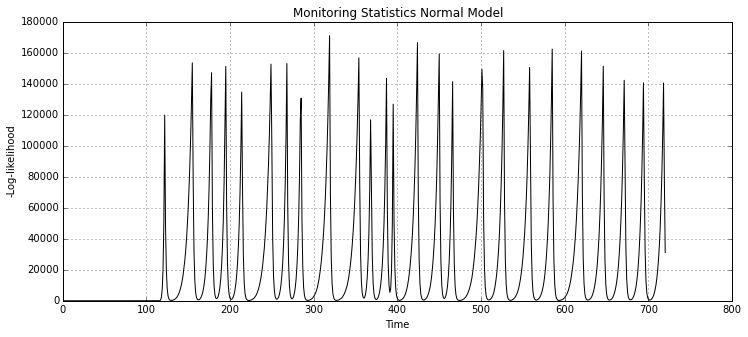

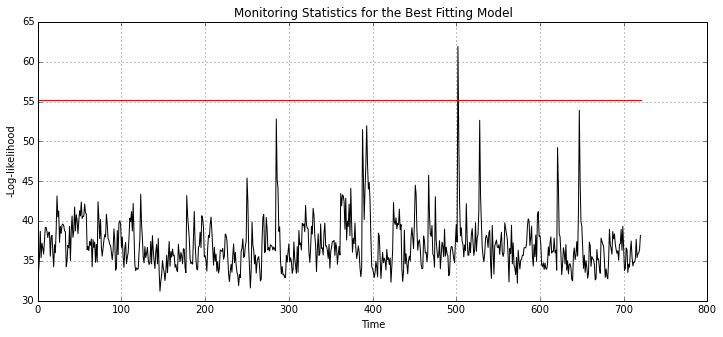

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault17
The detection delay was 16.


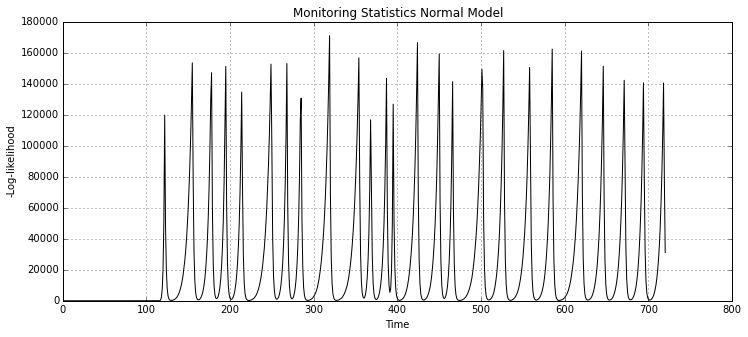

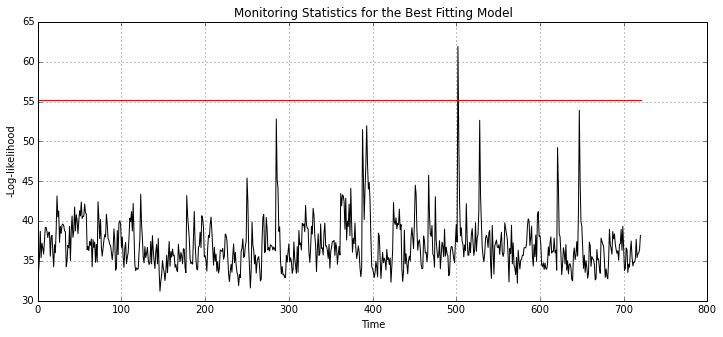

There is no model registered, creating a normal one.
Testing Fault2
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=4, n_init=1, n_iter=100, n_pc=2, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 4.


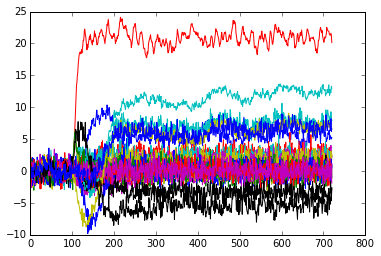

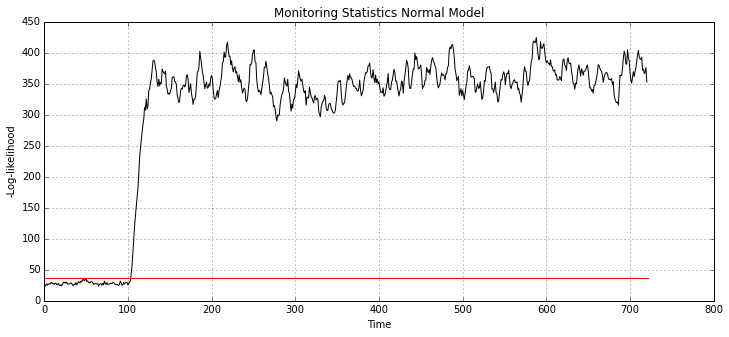

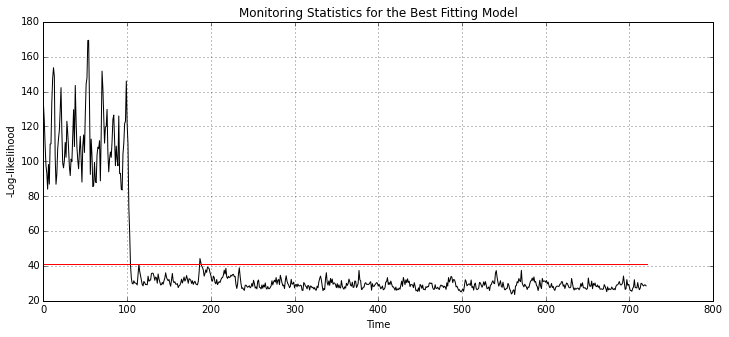

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault2
The detection delay was 4.


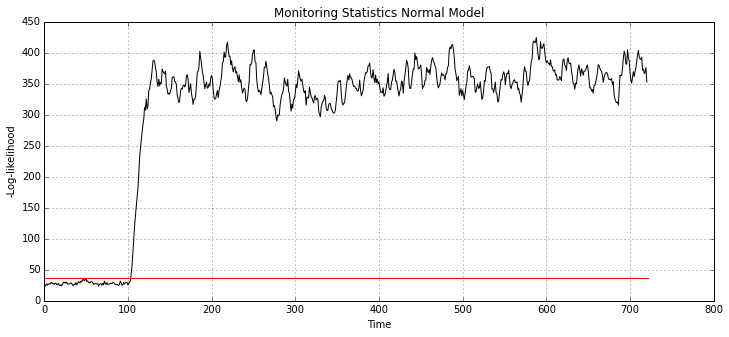

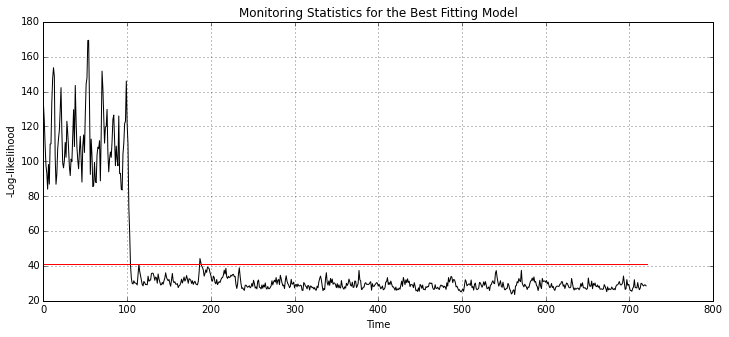

There is no model registered, creating a normal one.
Testing Fault3
---------
First test
Normal operation condition detected.
The detection delay was 190.


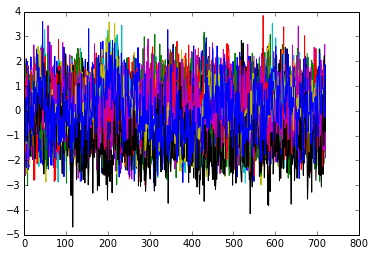

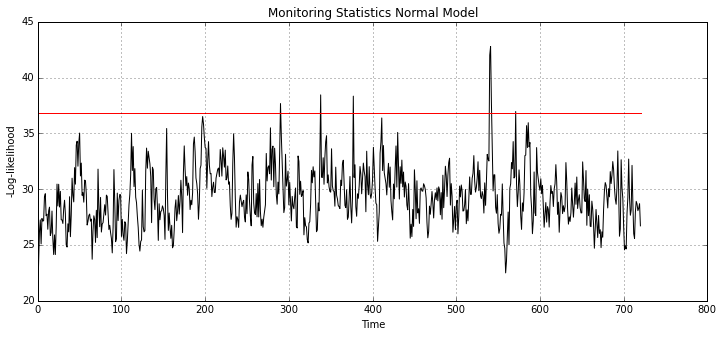

---------
Second test
Normal operation condition detected.
The detection delay was 190.


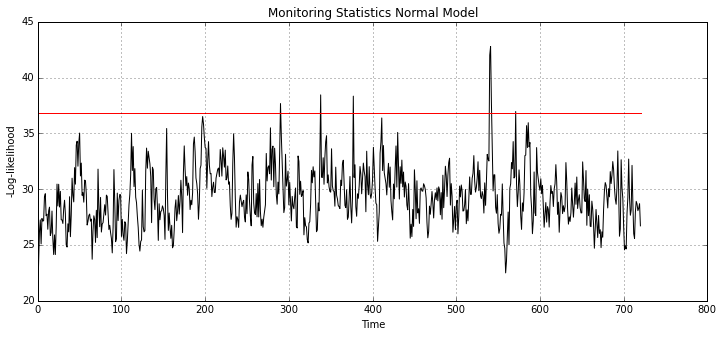

There is no model registered, creating a normal one.
Testing Fault1
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=10, n_init=1, n_iter=100, n_pc=3, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 1.


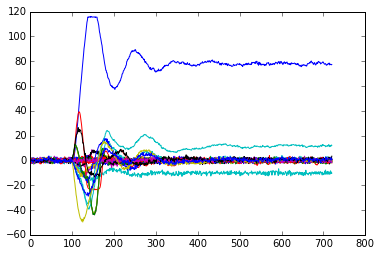

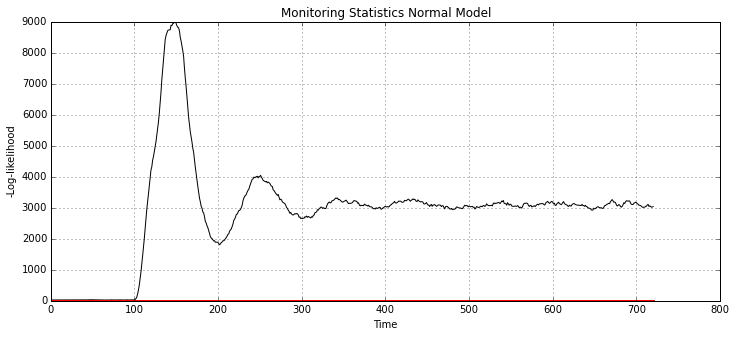

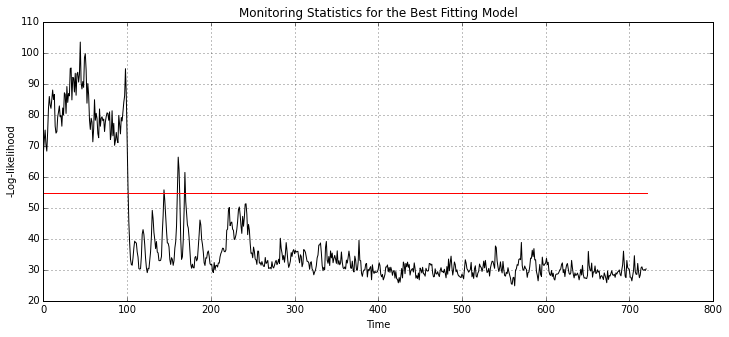

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault1
The detection delay was 1.


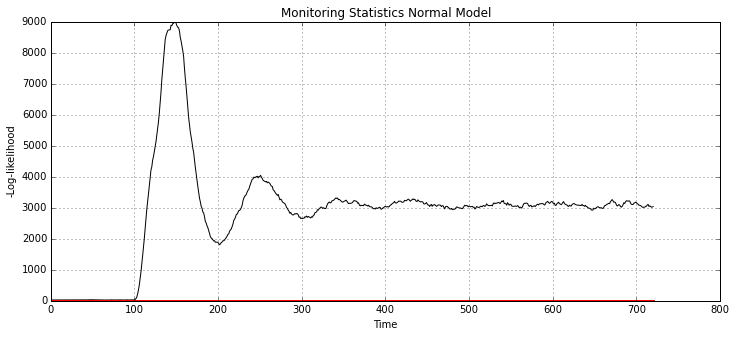

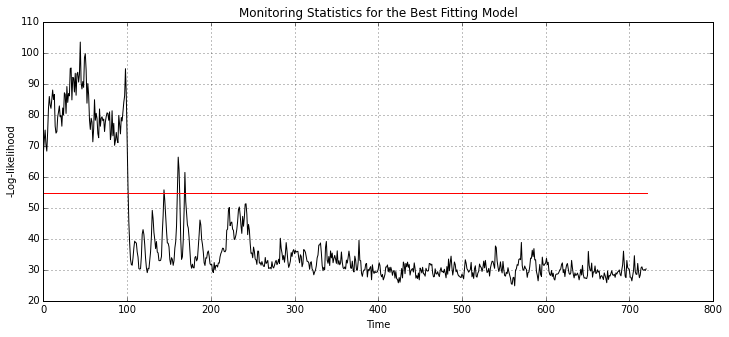

There is no model registered, creating a normal one.
Testing Fault6
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=11, n_init=1, n_iter=100, n_pc=17, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 0.


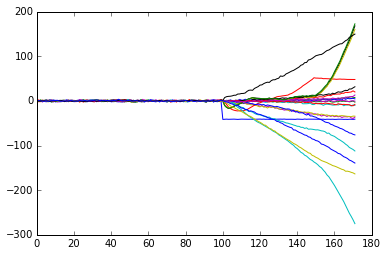

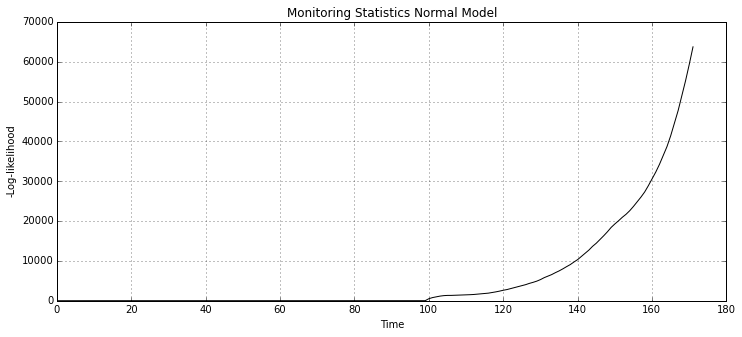

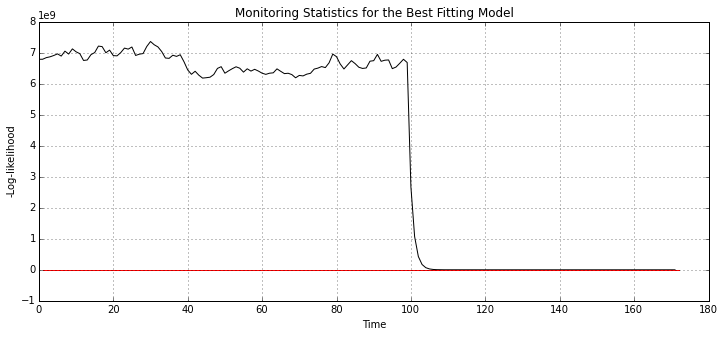

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault6
The detection delay was 0.


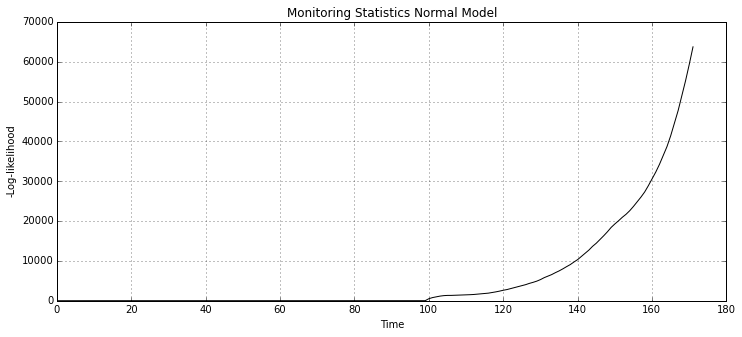

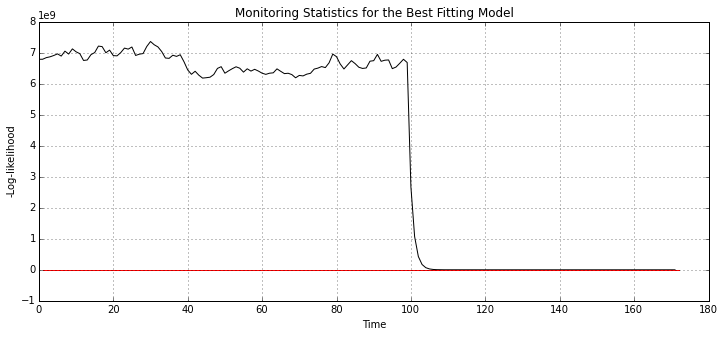

There is no model registered, creating a normal one.
Testing Fault7
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=11, n_init=1, n_iter=100, n_pc=2, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 0.


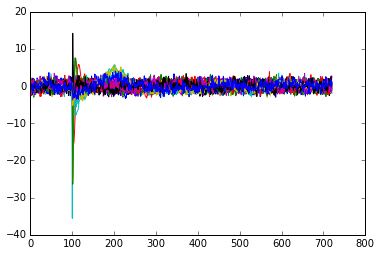

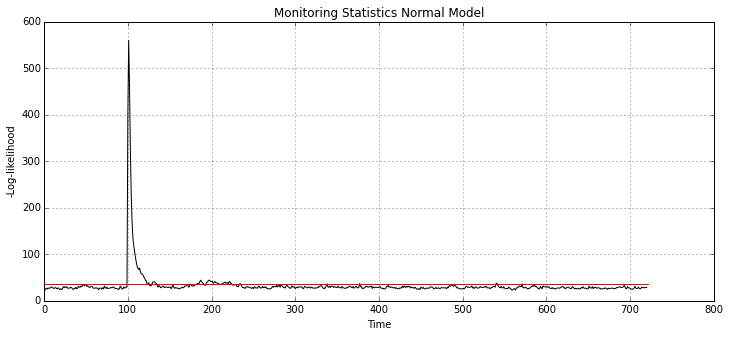

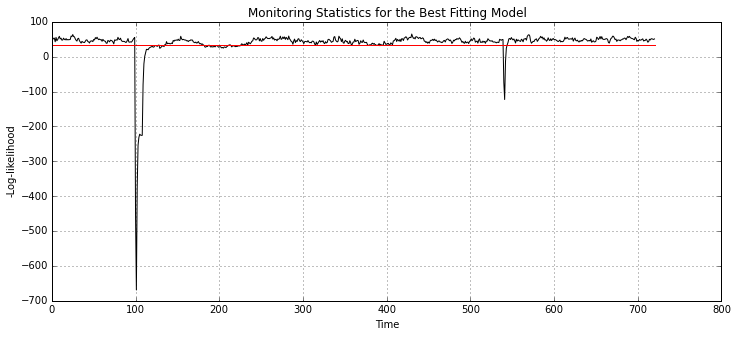

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault7
The detection delay was 0.


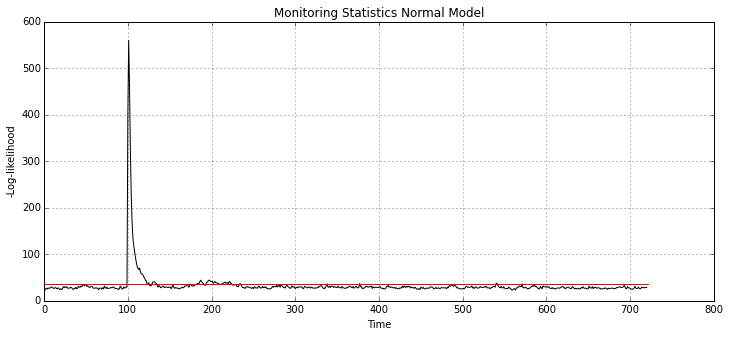

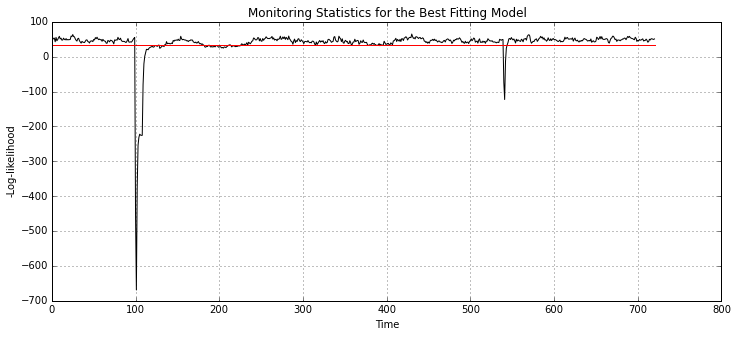

There is no model registered, creating a normal one.
Testing Fault4
---------
First test
Normal operation condition detected.
The detection delay was 1.


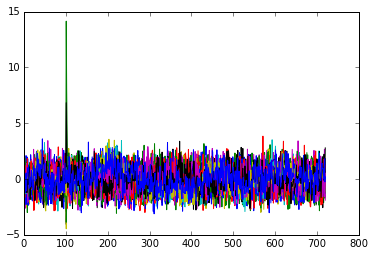

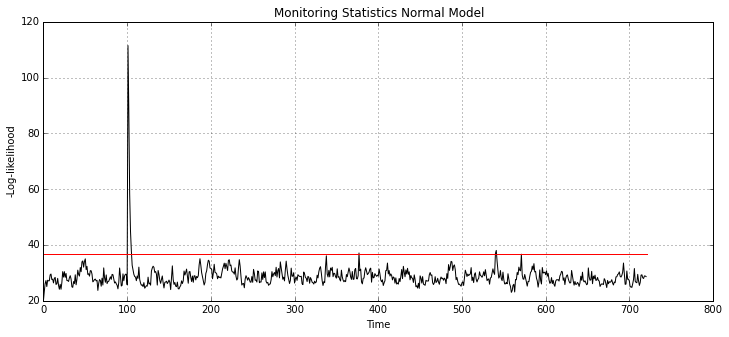

---------
Second test
Normal operation condition detected.
The detection delay was 1.


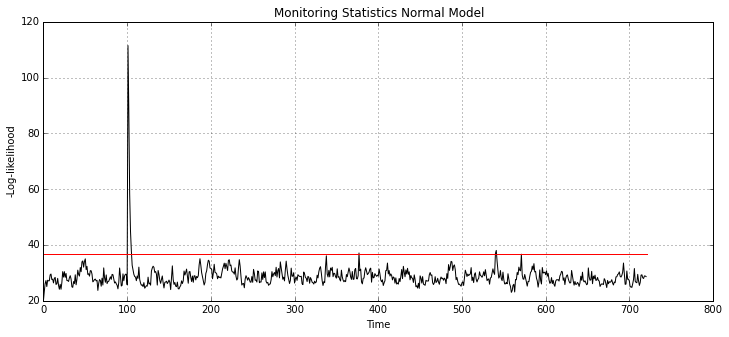

There is no model registered, creating a normal one.
Testing Fault5
---------
First test
Normal operation condition detected.
The detection delay was 440.


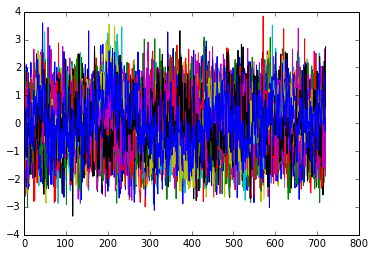

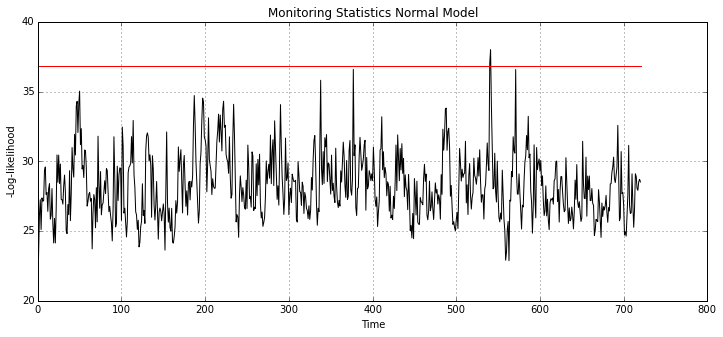

---------
Second test
Normal operation condition detected.
The detection delay was 440.


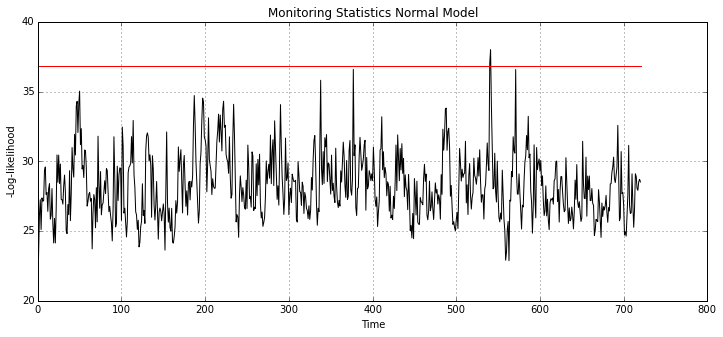

There is no model registered, creating a normal one.
Testing Fault8
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='RUR', init_params='wmpn', min_covar=1e-07,
   n_components=12, n_init=1, n_iter=100, n_pc=7, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 7.


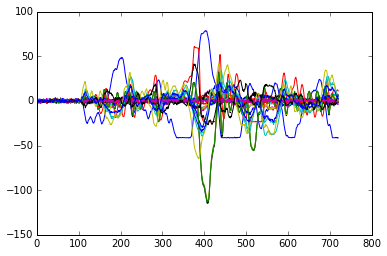

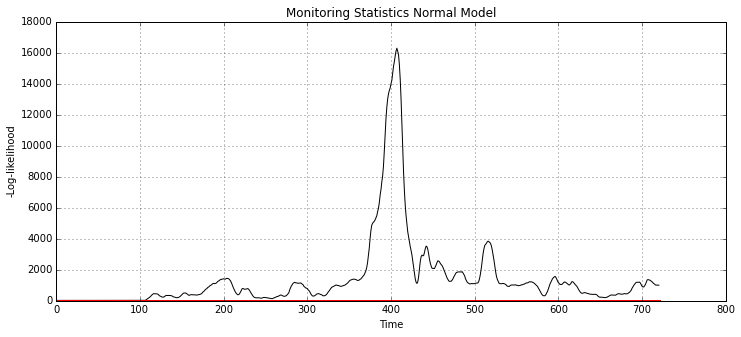

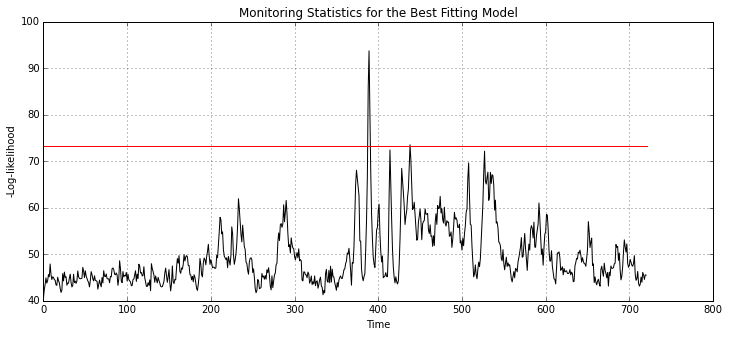

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault8
The detection delay was 7.


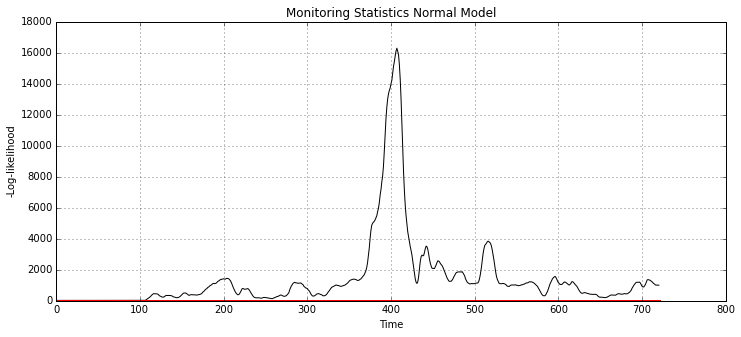

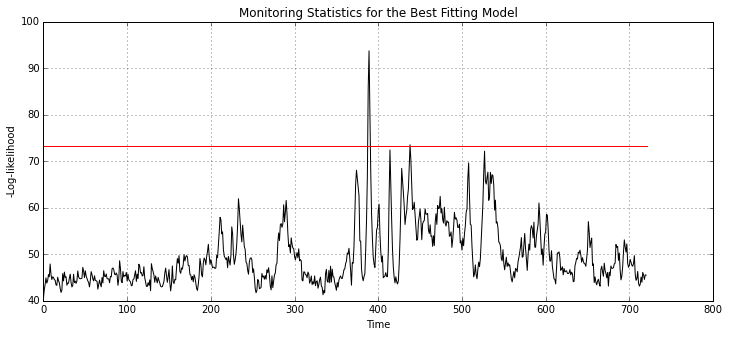

There is no model registered, creating a normal one.
Testing Fault9
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='UUU', init_params='wmpn', min_covar=1e-07,
   n_components=8, n_init=1, n_iter=100, n_pc=3, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 31.


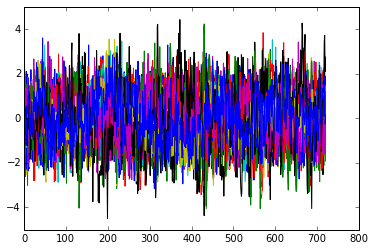

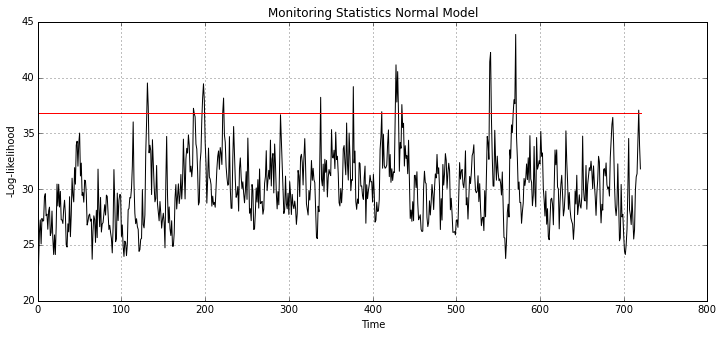

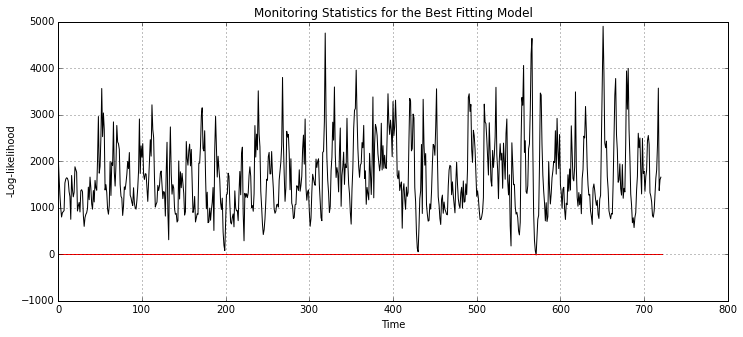

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault9
The detection delay was 31.


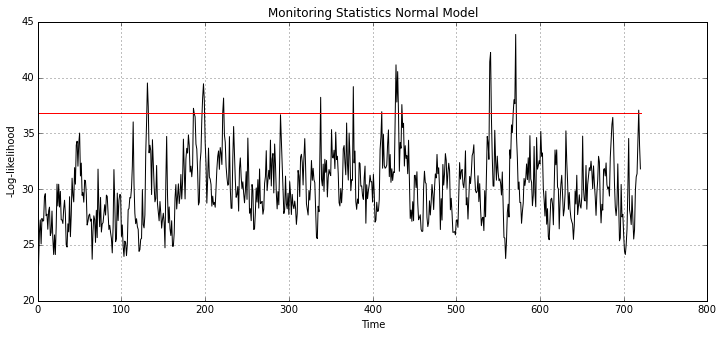

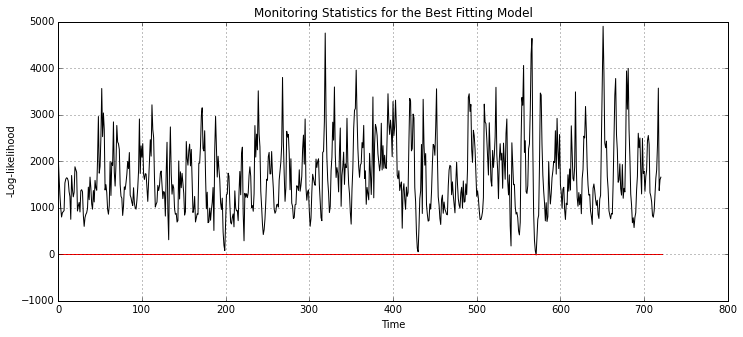

There is no model registered, creating a normal one.
Testing Fault20
---------
First test
Out of normal operation condition detected.
Unrecognized behaviour, training a new model.
New model: 
PGMM(covariance_type='RUR', init_params='wmpn', min_covar=1e-07,
   n_components=9, n_init=1, n_iter=100, n_pc=11, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
The detection delay was 25.


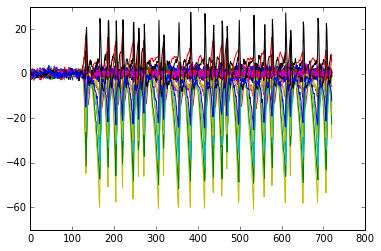

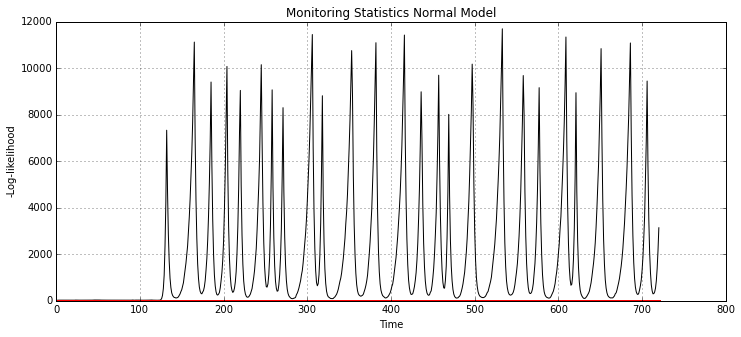

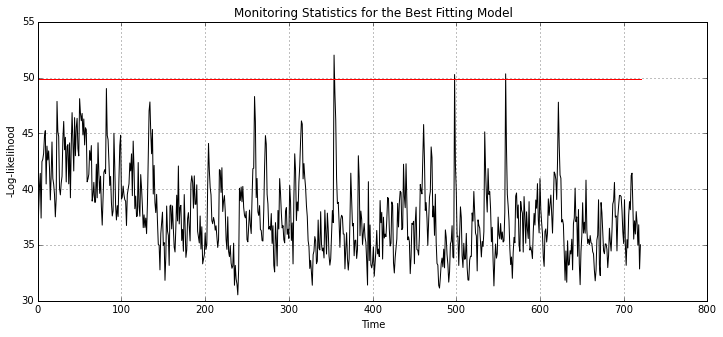

---------
Second test
Out of normal operation condition detected.
Fault classified as: Fault20
The detection delay was 25.


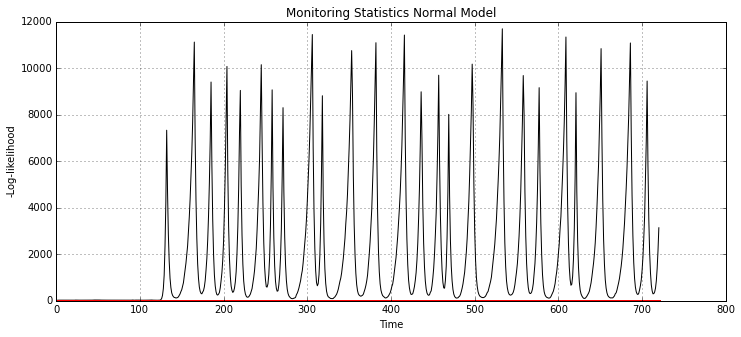

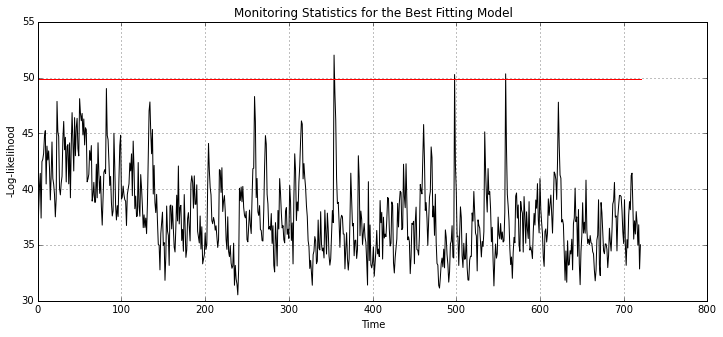

In [7]:
for key in complete_data:
    fdd = FDD(name='TEPFDD',
          training_type='spark',
          n_components=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
          n_pc=np.array([2, 3, 5, 7, 11, 13, 15, 17]),
          covar_types=np.array([1, 2, 3, 4, 5, 6, 7, 8]),
          n_jobs=16)
    _, _, _, _, id, is_new = fdd.fdd(x_normal)
    print('Testing ' + key)
    x_fault = complete_data[key]   
    plt.plot(x_fault)
    
    print('---------')
    print('First test')
    stats, thr, best_stats, best_thr, best_id, is_new = fdd.fdd(x_fault)
    if is_new:
        fdd.set_op_name(best_id, key)
        fdd.set_op_kind(best_id, 'fault')
        fdd.set_op_status(best_id, 'OK')
        new_op = fdd.get_op(best_id)
        print('New model: ')
        print(new_op.model)
    print('The detection delay was {}.'.format(np.argmax(stats > thr) - 100))

    plt.figure(figsize=(12, 5))
    plt.plot(stats, color = 'black')
    plt.plot((1, stats.shape[0]), (thr, thr), color = 'red')
    plt.title('Monitoring Statistics Normal Model')
    plt.ylabel('-Log-likelihood')
    plt.xlabel('Time')
    plt.grid()
    plt.show()
    if len(best_stats) > 0:
        plt.figure(figsize=(12, 5))
        plt.plot(best_stats, color = 'black')
        plt.plot((1, stats.shape[0]), (best_thr, best_thr), color = 'red')
        plt.title('Monitoring Statistics for the Best Fitting Model')
        plt.ylabel('-Log-likelihood')
        plt.xlabel('Time')
        plt.grid()
        plt.show()
        
    print('---------')
    print('Second test')
    stats, thr, best_stats, best_thr, best_id, is_new = fdd.fdd(x_fault)
    print('The detection delay was {}.'.format(np.argmax(stats > thr) - 100))

    plt.figure(figsize=(12, 5))
    plt.plot(stats, color = 'black')
    plt.plot((1, stats.shape[0]), (thr, thr), color = 'red')
    plt.title('Monitoring Statistics Normal Model')
    plt.ylabel('-Log-likelihood')
    plt.xlabel('Time')
    plt.grid()
    plt.show()
    if len(best_stats) > 0:
        plt.figure(figsize=(12, 5))
        plt.plot(best_stats, color = 'black')
        plt.plot((1, stats.shape[0]), (best_thr, best_thr), color = 'red')
        plt.title('Monitoring Statistics for the Best Fitting Model')
        plt.ylabel('-Log-likelihood')
        plt.xlabel('Time')
        plt.grid()
        plt.show()

Deu certo: 1, 8, 10, 11, 12, 13, 14, 17, 19, 20

Falhou durante o treinamento: 2, 7, 18,

Weird: 3 (igual ao normal), 4 (apenas um pico no inicial, depois igual a normal), 5 (igual a normal), 6 (explode), 9 (funciona, mas muito parecido com o normal), 15 (Igual ao normal),  16 (igual ao normal), 

In [11]:
fdd.models[0].model

PGMM(covariance_type='URU', init_params='wmpn', min_covar=1e-07,
   n_components=2, n_init=1, n_iter=100, n_pc=2, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)